# 02 - Ideal Strategic Exploratory Data Analysis (Corrected Order)

## Description
This notebook conducts a comprehensive EDA on the cleaned dataset. The sections are now correctly ordered to ensure features are created before they are used in analyses.

### 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
from wordcloud import WordCloud
import sys

# Add project root to path for src imports
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from src import config
from src.visualization import plot_correlation_heatmap, plot_top_n_bar_chart

# Visualization Settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)

# Load Cleaned Data
df = pd.read_csv(config.CLEANED_DATA_FILE)
df['release_date'] = pd.to_datetime(df['release_date'])

print("Cleaned dataset loaded.")

Cleaned dataset loaded.


### 2. Descriptive Statistics

In [2]:
df.describe()

,release_date,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_views,youtube_likes,tiktok_posts,tiktok_likes,...,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,tidal_popularity,explicit_track
count,3818,3818.000000,3.818000e+03,3818.000000,3.818000e+03,3818.000000,3.818000e+03,3.818000e+03,3.818000e+03,3.818000e+03,...,3818.000000,3818.000000,3.818000e+03,3818.000000,3.818000e+03,3.818000e+03,3.818000e+03,3.818000e+03,3818.0,3818.000000
mean,2020-11-21 04:49:39.570455808,41.575799,4.548236e+08,64175.602672,2.470371e+07,54.558669,3.801001e+08,2.841315e+06,6.990429e+05,9.148545e+07,...,148.340492,27.781561,1.021300e+06,20.789157,7.264068e+07,7.057929e+04,4.515140e+06,2.269596e+06,0.0,0.378208
min,1987-07-21 00:00:00,19.400000,1.071000e+03,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000
25%,2019-04-15 06:00:00,23.400000,7.444613e+07,8737.000000,5.647618e+06,53.000000,3.074043e+07,3.209140e+05,5.397500e+02,4.395760e+05,...,0.000000,2.000000,7.325500e+03,2.000000,3.154050e+04,3.625000e+01,0.000000e+00,1.428408e+05,0.0,0.000000
50%,2022-04-15 00:00:00,30.000000,2.507276e+08,37173.000000,1.445300e+07,65.000000,1.330882e+08,1.177344e+06,7.804450e+04,1.522128e+07,...,9.000000,10.000000,1.396415e+05,12.000000,4.537180e+06,3.091000e+03,0.000000e+00,7.181130e+05,0.0,0.000000
75%,2023-07-28 00:00:00,44.200000,6.526171e+08,93917.500000,3.158595e+07,72.000000,4.396101e+08,3.534706e+06,4.880170e+05,7.183611e+07,...,116.750000,32.000000,6.281930e+05,30.000000,5.877237e+07,2.999900e+04,3.465888e+05,2.520360e+06,0.0,1.000000
max,2024-06-12 00:00:00,725.400000,4.281469e+09,590392.000000,2.623434e+08,95.000000,1.632276e+10,6.231118e+07,3.772646e+07,2.347422e+10,...,7098.000000,632.000000,4.819785e+07,189.000000,1.463624e+09,3.556791e+06,3.198359e+08,4.484264e+07,0.0,1.000000
std,NaN,37.653720,5.329372e+08,73059.894138,3.027820e+07,27.053346,6.861781e+08,4.541705e+06,2.062110e+06,5.265800e+08,...,443.887722,52.468282,3.144779e+06,25.430943,1.584484e+08,2.335269e+05,1.852650e+07,3.918397e+06,0.0,0.485004


### 3. Univariate Analysis: Performance Metrics Distribution

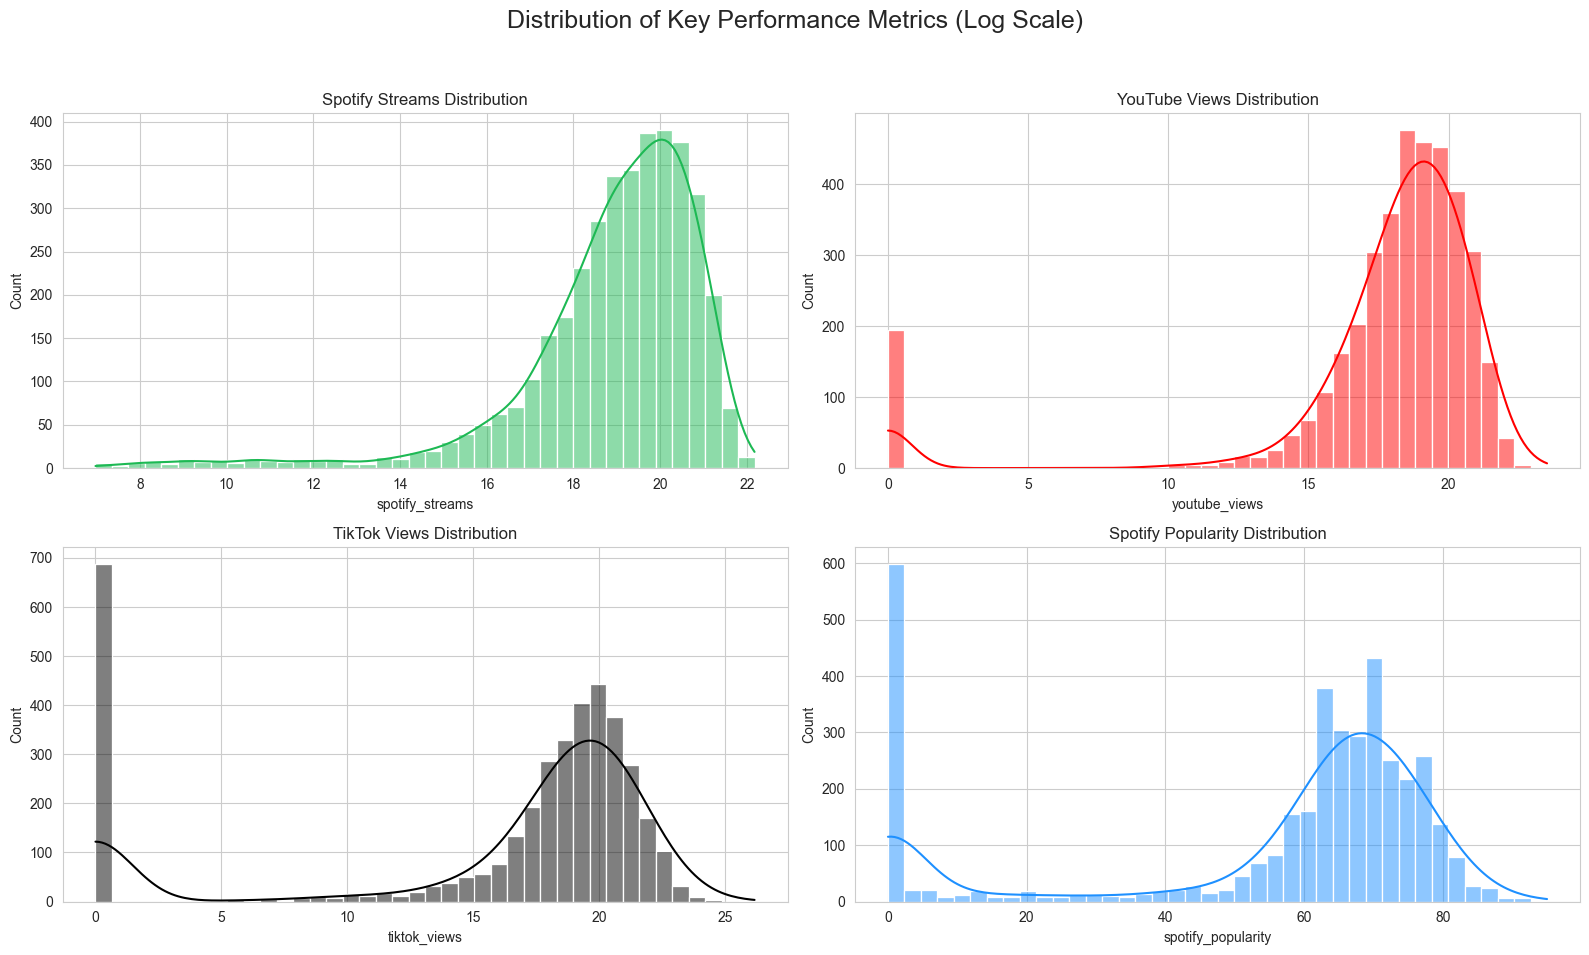

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Distribution of Key Performance Metrics (Log Scale)', fontsize=18)

sns.histplot(np.log1p(df['spotify_streams']), bins=40, kde=True, ax=axes[0,0], color='#1DB954')
axes[0,0].set_title('Spotify Streams Distribution')

sns.histplot(np.log1p(df['youtube_views']), bins=40, kde=True, ax=axes[0,1], color='#FF0000')
axes[0,1].set_title('YouTube Views Distribution')

sns.histplot(np.log1p(df['tiktok_views']), bins=40, kde=True, ax=axes[1,0], color='#000000')
axes[1,0].set_title('TikTok Views Distribution')

sns.histplot(df['spotify_popularity'].dropna(), bins=40, kde=True, ax=axes[1,1], color='#1E90FF')
axes[1,1].set_title('Spotify Popularity Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Insight: The Log-Normal Nature of Success and Catalog Segmentation**
The log-normal distribution of the streaming and view counts is a classic indicator of a multiplicative growth process, often seen in hit-driven markets. Success isn't linear; it compounds. A song doesn't just add a fixed number of streams each day; its existing popularity drives further discovery, creating a "snowball effect." This is the mathematical signature of virality.
The skew in the spotify_popularity score confirms the nature of our dataset: we are analyzing successful tracks, so they are expected to be popular. The small bump of songs with low popularity represents "sleeping giants"—older tracks that have massive all-time stream counts but are no longer in high rotation on current playlists, thus having a low current popularity score.

### 4. Feature Engineering
We create new features from existing data to enable deeper analysis. This step is now performed *before* analyses that depend on these new features.

In [4]:
# Song age in days (relative to a fixed date for consistency)
df['days_since_release'] = (pd.to_datetime('2025-07-07') - df['release_date']).dt.days

# YouTube engagement ratio
df['youtube_engagement_ratio'] = (df['youtube_likes'] / df['youtube_views']).fillna(0)

# Playlist density (average reach per playlist)
df['playlist_density'] = (df['spotify_playlist_reach'] / df['spotify_playlist_count']).fillna(0)

# Replace any potential infinite values from division by zero
df.replace([np.inf, -np.inf], 0, inplace=True)

print("New features created: 'days_since_release', 'youtube_engagement_ratio', 'playlist_density'")
df[['track', 'days_since_release', 'youtube_engagement_ratio', 'playlist_density']].head()

New features created: 'days_since_release', 'youtube_engagement_ratio', 'playlist_density'


,track,days_since_release,youtube_engagement_ratio,playlist_density
0,Blinding Lights,2047,0.012105,280.396772
1,Shape of You,3104,0.005711,467.914590
2,Someone You Loved,2433,0.009700,473.941720
3,Sunflower - Spider-Man: Into the Spider-Verse,2454,0.007025,316.049148
4,As It Was,1194,0.011364,417.036301


**Insight: Reach and Longevity Outweigh Niche Engagement for Mega-Hits**
This analysis reveals that global mega-hits like "Blinding Lights" and "Shape of You" share key characteristics that set them apart from niche or viral successes. These songs demonstrate remarkable longevity, with thousands of days since release, and consistently low YouTube engagement ratios (likes per view), around 1%. However, this low engagement is not a weakness—it reflects the vast reach of these tracks, which have moved beyond passionate fanbases into the general public. Additionally, these songs are featured on highly influential playlists with massive followings, as shown by their high playlist_density.
The findings highlight a strategic framework for building enduring hits. For A&R, the focus should be on identifying tracks with broad, timeless appeal instead of chasing fleeting trends. Marketing efforts should aim to maximize reach rather than optimize for engagement ratios, as mass exposure matters more than intense interaction from a small audience. For digital strategy, securing placement on a few high-impact playlists is far more valuable than appearing on many low-reach ones—making playlist_density a key promotional metric.

### 5. Correlation & Cross-Platform Analysis
Now that all features exist, we can investigate how success on one platform relates to another.

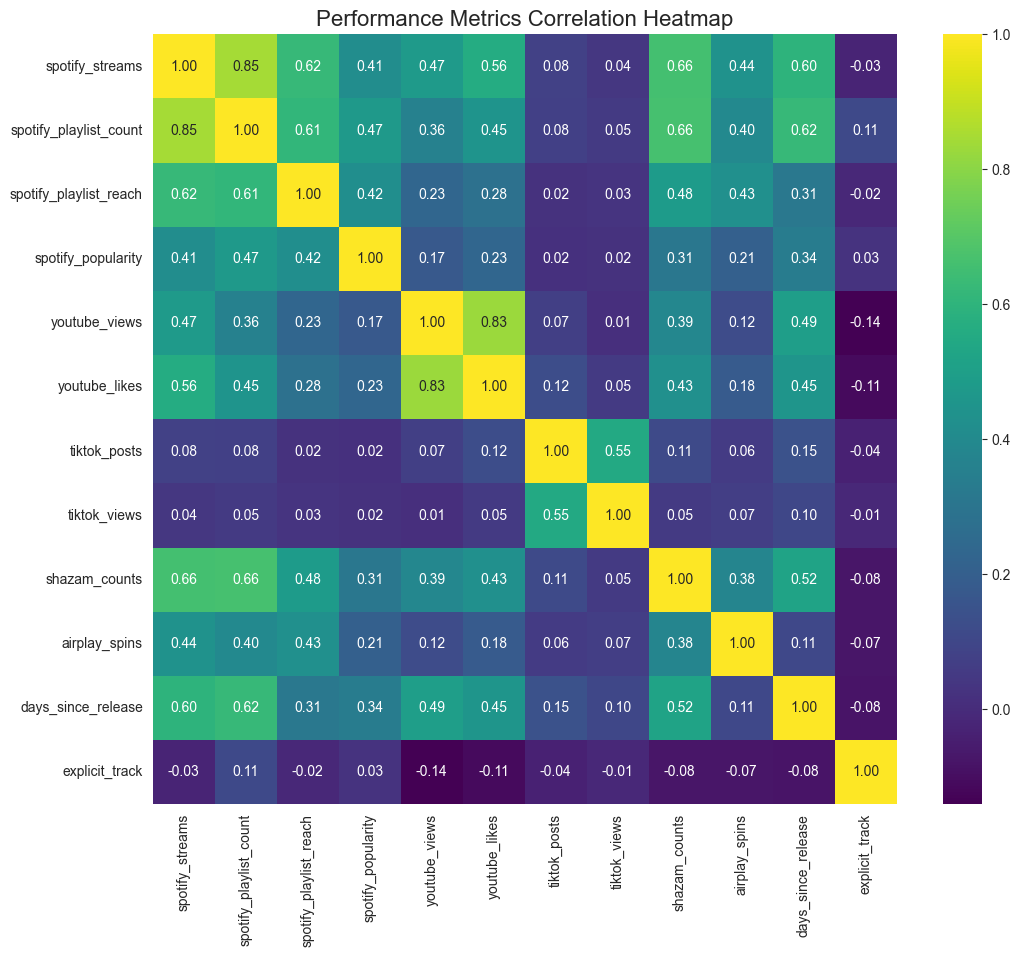

In [5]:
# Use the MODEL_FEATURES list from our config, which includes the new feature
plot_correlation_heatmap(
    df=df,
    cols=config.MODEL_FEATURES,
    title='Performance Metrics Correlation Heatmap'
)

**Insight: Playlisting Dominates Spotify, While TikTok Drives Discovery, Not Direct Consumption**
This heatmap clearly illustrates that the pathways to success are not uniform across different platforms. The most powerful relationship is found within Spotify's own ecosystem, where spotify_playlist_count shows an exceptionally strong positive correlation of 0.85 with spotify_streams. This confirms that playlisting is the single most important mechanism for driving listens on the platform. In stark contrast, tiktok_views exhibit a near-zero correlation (0.05) with spotify_streams, strongly suggesting that viral success on TikTok does not automatically translate into a proportional increase in Spotify consumption.
The strategic implication is that marketing efforts must be platform-specific and not based on a one-size-fits-all approach. To succeed on Spotify, the primary strategy must be an aggressive playlist-pitching campaign to leverage the platform's internal growth loops. A TikTok campaign should be viewed as a powerful tool for generating initial discovery and brand awareness (as supported by its higher correlation with shazam_counts), but it requires a separate, deliberate strategy to convert that fleeting viral moment into sustained, long-term streaming habits on audio platforms.

#### Explicit Content vs. Popularity

C:\Users\cld4ca\AppData\Local\Temp\ipykernel_27272\1618682047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='explicit_track', y=np.log1p(df['spotify_streams']), data=df, palette=['#1E90FF', '#FF4500'])


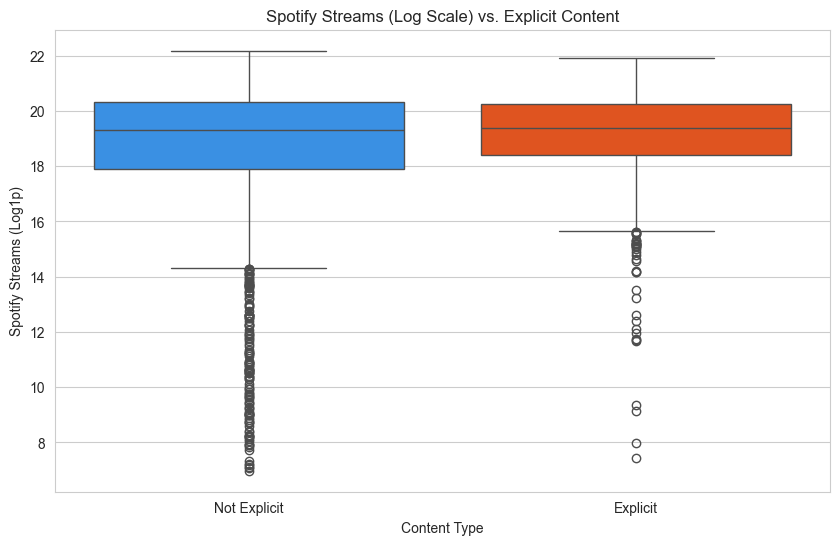

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='explicit_track', y=np.log1p(df['spotify_streams']), data=df, palette=['#1E90FF', '#FF4500'])
plt.title('Spotify Streams (Log Scale) vs. Explicit Content')
plt.xticks([0, 1], ['Not Explicit', 'Explicit'])
plt.ylabel('Spotify Streams (Log1p)')
plt.xlabel('Content Type')
plt.show()

**Insight: Explicit Content Poses No Barrier to Top-Tier Streaming Success**
This boxplot reveals that there is virtually no significant difference in the distribution of Spotify streams between explicit and non-explicit tracks that have achieved hit status. The median stream count (the line inside the box) for explicit songs is slightly higher, and the interquartile ranges (the boxes themselves) are almost identical. This demonstrates that once a song becomes popular, its explicit nature does not limit its potential to reach the highest echelons of streaming success on the platform.
The strategic implication for artists and labels is a clear signal of creative freedom. The fear that an "explicit" label might hinder a track's commercial viability is largely unfounded within the core music streaming audience, which is not deterred by such content. This data empowers artists to stay true to their vision without self-censoring for commercial reasons, knowing that the path to a global streaming hit remains wide open.

### 6. Artist & Track Performance

c:\Users\cld4ca\Desktop\Spotify\src\visualization.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette=color_palette)


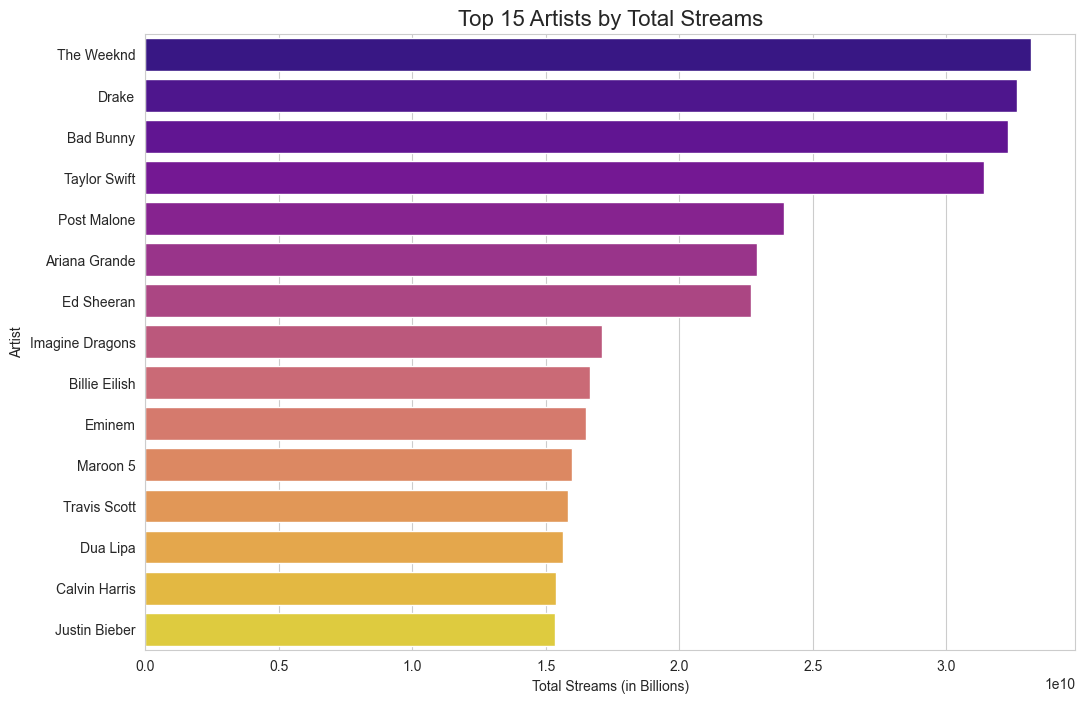

In [7]:
top_artists_by_streams = df.groupby('artist')['spotify_streams'].sum().nlargest(15)

plot_top_n_bar_chart(
    data=top_artists_by_streams,
    title='Top 15 Artists by Total Streams',
    xlabel='Total Streams (in Billions)',
    ylabel='Artist',
    color_palette='plasma'
)

**Insight: Streaming Market is Dominated by a Handful of "Franchise" Artists**
This chart clearly illustrates the immense market concentration at the pinnacle of the music industry. A very small number of global superstars—with The Weeknd, Drake, Bad Bunny, and Taylor Swift forming an elite top tier—are responsible for a disproportionately massive volume of streams. This ranking is not a reflection of a single hit's transient popularity but rather a measure of each artist's powerful brand equity and deep catalog value. Their dominance is built upon a foundation of multiple, high-performing tracks that have demonstrated longevity by accumulating billions of streams over several years.
For record labels and investors, this visualization underscores the "franchise" model of the modern music business. The highest return on investment comes from developing and managing these mega-brands, whose catalogs provide a stable and predictable revenue stream. For aspiring artists, it highlights that while a single hit can provide a breakthrough, achieving this level of success requires building a durable catalog of songs that retain their appeal long after their initial release week, a strategy centered on consistency and long-term relevance.

### 7. Temporal Analysis

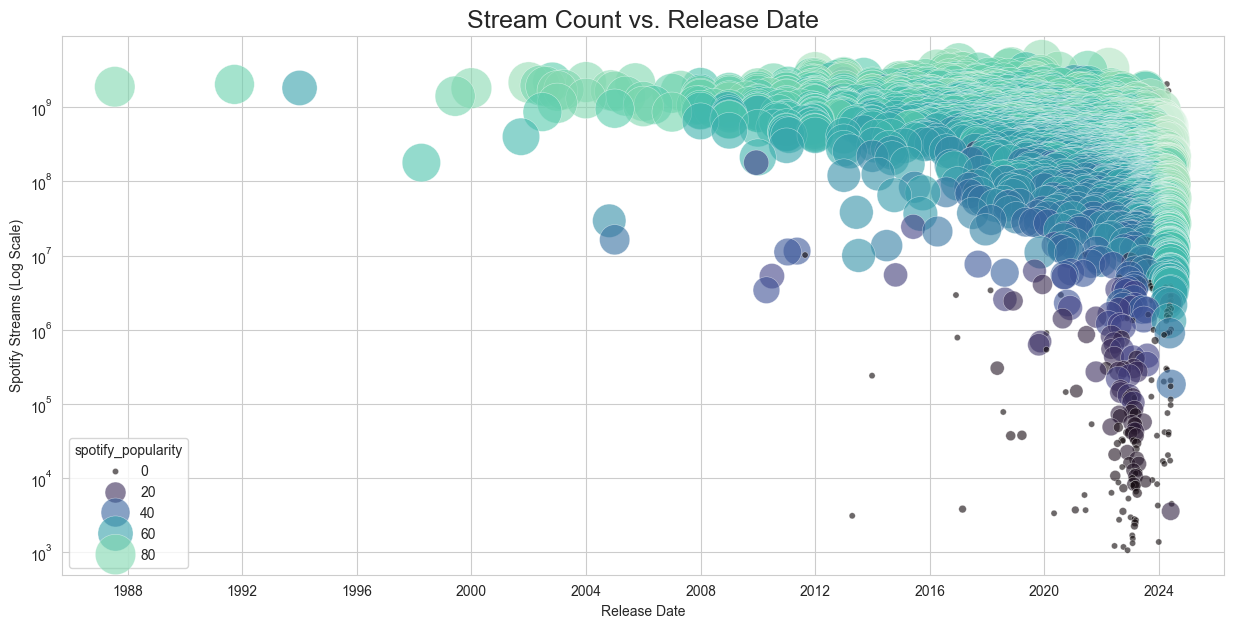

In [ ]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='release_date', y='spotify_streams', 
                size='spotify_popularity', hue='spotify_popularity', 
                sizes=(20, 1000), alpha=0.6, palette='mako')

plt.yscale('log')
plt.title('Stream Count vs. Release Date', fontsize=18)
plt.xlabel('Release Date')
plt.ylabel('Spotify Streams (Log Scale)')
plt.show()

**Insight: Recency Drives Popularity, While Catalog Drives Long-Term Value**
This chart powerfully illustrates the two distinct economies of the music streaming world. The concentration of large, brightly colored bubbles on the right side shows that current popularity (high spotify_popularity score) is overwhelmingly dominated by recent releases. To be considered "hot" right now, a song almost certainly must be new. However, the vertical axis reveals a different story: many of the all-time highest-streamed songs are "catalog classics" from the 1990s and 2000s. These older tracks, represented by smaller, darker bubbles, may no longer be buzzworthy, but their cumulative stream counts prove their immense and durable value.
The strategic implication is that a successful music business must operate on two fronts. For new releases, the strategy is a fast-paced game of maximizing immediate cultural impact to capture high popularity scores. For older music, the strategy must be active catalog management. This data proves that older hits are not depreciating assets but long-term annuities. They should be actively monetized through sync licensing for media, inclusion in high-traffic "throwback" playlists, and targeted promotion around anniversaries to capitalize on nostalgia and introduce them to new generations of listeners.